# **Solar ultraviolet spectroscopy** #

This tutorial includes information on ultraviolet spectroscopic observations of solar flares and provides guidance on how to analyze flare data using Python programming.

We will be using ultravoilet spectroscopic observation of a solar flare from the Extreme Ultraviolet Variability Experiment (EVE) instrument on board the Solar Dynamics Observatory (SDO) observatory. Since 2010, EVE has been observing the Sun and produce a spectrum in the wavelength range of 0.1 to 105 nm. It provides data with a time resolution of 10 seconds in "Sun as a star" mode and does not offer image resolution.

The EVE instrument employs two grating spectrographs: MEGS-A for short wavelengths (5-37 nm) and MEGS-B for longer wavelengths (35-105 nm). Each spectrograph images the wavelength-dispersed whole solar disk onto a CCD.

### **EVE instrument:** ### 
link - https://lasp.colorado.edu/home/missions-projects/quick-facts-sdo-eve/ \
link - https://lasp.colorado.edu/home/eve/ 

### **Level 2 Science Products** ###

The EVE Level 2 products are stored in the scientific format called FITS as binary tables.

Two types of EVE level 2 products are routinely created: Spectra (EVS) and Lines (EVL).

Level 2 spectra are the merged spectral measurements from the two spectrographs, MEGS
A and B. \
The A detector is designed to measure from 6 - 17 nm, and 17 - 37 nm using two filters, while \
the B detector is designed to measure 37 - 106 nm. \
Level 2 processing stitches these pieces to form one spectrum. \
All level 2 irradiances are adjusted to 1 AU. 

Level 2 line files contain selected lines derived from the level 2 spectra, ESP diode values and bands that correspond to other SDO instruments and some derived proxies.

### **Naming Convention** ###

Level 2 products follow this naming convention: \
EV?_L2_YYYYDDD_HH_vvv_rr.fit where: \
EV designates this as an EVE product \
? is either S (spectrum) or L (lines/bands) \
L2 designates this as a level 2 product YYYY is the year \
DDD is the day of year (001 - 366) \
HH is the UT hour of day (00 - 23) \
vvv is the version number (007) \
rr is the revision number (01 - 99) 
        
### **Science data access** ### 
link: https://lasp.colorado.edu/eve/data_access/index.html


### **EVE level 2 data download** ###
link: https://lasp.colorado.edu/eve/data_access/eve_data/misc/eve_calendars/calendar_level2_2018.html

### **EVE documentation** ###
link: https://lasp.colorado.edu/eve/data_access/eve-documentation/index.html  

### **Full documentation for the flare catalog** ###
link: https://lasp.colorado.edu/eve/data_access/eve-flare-catalog/index.html \
link: https://lasp.colorado.edu/eve/data_access/eve_data/Flare_Catalog/eve_flare_catalog.pdf

In [1]:
### Importing relevant modules

import numpy as np

from astropy.io import fits
import astropy.units as u

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator

from scipy import stats
import scipy as scipy
from scipy import optimize
from scipy.optimize import curve_fit

# you need to install lmfit package - conda install -c conda-forge lmfit
#from lmfit import Model, Parameters
import matplotlib.ticker as tck

# set the font globally
# plt.rcParams.update({'font.family':'sans-serif'})

# set the font name for a font family
# plt.rcParams.update({'font.sans-serif':'Helvetica'})

from datetime import timedelta


In [2]:
# locate the file path where EVE spectrum data is available
# summarizes the content of the opened FITS file

#eves_flare_file1 = fits.open('/data/p010/EVS/2011/EVS_L2_2011227_18_007_01.fit.gz')
eves_flare_file1 = fits.open('/Users/sargammulay/Desktop/python/EVE_puthon_tutorial/EVS_L2_2013134_01_007_01.fit.gz')

eves_flare_file1

# HDUList - https://docs.astropy.org/en/stable/io/fits/api/hdulists.html#astropy.io.fits.HDUList

# The open function returns an object called an HDUList which is a list-like collection of HDU objects. 
# An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header 
# and (typically) a data array or table.

# hdul[0] is the primary HDU, hdul[1] is the first extension HDU, etc.
# It should be noted that astropy uses zero-based indexing when referring to HDUs and header cards, 
# though the FITS standard.


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x15503ae40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1055ba8a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x15506d9a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x15506f3b0>]

In [3]:
# Index of HDU for which info is to be returned.

eves_flare_file1.index


<function HDUList.index(value, start=0, stop=9223372036854775807, /)>

In [4]:
# Returns a dictionary detailing information about the locations of the indexed HDU within any associated file.
# read the header of the file
eves_flare_file1.info()

Filename: /Users/sargammulay/Desktop/python/EVE_puthon_tutorial/EVS_L2_2013134_01_007_01.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SpectrumMeta    1 BinTableHDU     29   5200R x 2C   [E, E]   
  2  SpectrumUnits    1 BinTableHDU     40   1R x 10C   [87A, 68A, 65A, 55A, 87A, 39A, 149A, 61A, 122A, 53A]   
  3  Spectrum      1 BinTableHDU     92   360R x 10C   [D, J, D, B, B, D, 5200E, 5200E, 5200E, 5200B]   


### **Level 2 Spectra Products** ###

The level 2 spectrum files contain 3 header data units, \
SpectrumMeta, SpectrumUnits and Spectrum. 

These data units contain the fully calibrated 10-second spectral irradiance values along with supplemental information.


In [5]:
eves_flare_file1

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x15503ae40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1055ba8a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x15506d9a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x15506f3b0>]

In [6]:
eves_flare_file1[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                    8 /Number of bytes per row                         
NAXIS2  =                 5200 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'SpectrumMeta'                                                        
TUNIT1  = 'nm'              

In [7]:
print(type(eves_flare_file1[0].header))

<class 'astropy.io.fits.header.Header'>


In [8]:
# check the header of the file
eves_flare_file1[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.11                  
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

In [9]:
print(type(eves_flare_file1[0].data))

<class 'NoneType'>



### **Level 2 spectrum file - Header 1 - SpectrumMeta** ###

The SpectrumMeta data unit contains two arrays, \
one being the center wavelengths of each spectral bin. \
The other array contains the estimate of accuracy of the irradiance on a per bin basis. 


| Column Name | Type | Description |
| :-: | :-: | :-: |
| Wavelength | float | 3.4 |
| Accuracy | float | 0.005 |


In [10]:
print(type(eves_flare_file1[1].header))

<class 'astropy.io.fits.header.Header'>


In [11]:
eves_flare_file1[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                    8 /Number of bytes per row                         
NAXIS2  =                 5200 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'SpectrumMeta'                                                        
TUNIT1  = 'nm'              

In [12]:
print(type(eves_flare_file1[1].data))

<class 'astropy.io.fits.fitsrec.FITS_rec'>


In [13]:
eves_flare_file1[1].data

FITS_rec([(  3.01, -1.       ), (  3.03, -1.       ),
          (  3.05, -1.       ), ..., (106.95, -2.585639 ),
          (106.97, -2.5856473), (106.99, -2.5856557)],
         dtype=(numpy.record, [('WAVELENGTH', '>f4'), ('ACCURACY', '>f4')]))

In [14]:
eves_flare_file1[1].data.shape

(5200,)


### **Level 2 spectrum file - Header 2 - SpectrumUnits** ###

The SpectrumUnits data unit provides information on the units for each element in the Spectrum data unit.

| Column Name | Type | Description |
| ----------- | ---- | ----------- |
| TAI | STRING | Seconds // International Atomic Time seconds since Jan 1, 1958 at center |
| YYYYDOY | STRING | NA // 4-digit year and 3-digit day of year designator with Jan 1=001 |
| SOD | STRING | Seconds // seconds of the UT day at the center of the integration |
| FLAGS | STRING | NA // 0=good, other values indicate data may be suspect |
| SC_FLAGS | STRING | NA // 0=good, other value indicate spacecraft events like eclipses, lunar |
| INT_TIME | STRING | Seconds // the duration of the exposure |
| IRRADIANCE | STRING | W m^-2 nm^-1 // Spectral power per unit area per nanometer at 1-AU with M |
| COUNT_RATE | STRING | Counts s^-1 // Dark corrected count rate per pixel per second |
| PRECISION | STRING | NA // relative precision, 0=perfect measurement, 1=signal equals noise, m |
| BIN_FLAGS | STRING | NA // flag for each spectral bin, 0=good, 255=missing |

In [15]:
print(type(eves_flare_file1[2].header))

<class 'astropy.io.fits.header.Header'>


In [16]:
eves_flare_file1[2].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  786 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   10 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'SpectrumUnits'                                                       
COMMENT                     

In [17]:
print(type(eves_flare_file1[2].data))

<class 'astropy.io.fits.fitsrec.FITS_rec'>


In [18]:
eves_flare_file1[2].data

FITS_rec([('seconds // International Atomic Time seconds since Jan 1, 1958 at center of integration', 'NA // 4-digit year and 3-digit day of year designator with Jan 1=001', 'seconds // seconds of the UT day at the center of the integration', 'NA // 0=good, other values indicate data may be suspect', 'NA // 0=good, other value indicate spacecraft events like eclipses, lunar transits, etc', 'seconds // the duration of the exposure', 'W m^-2 nm^-1 // Spectral power per unit area per nanometer at 1-AU with MEGS-A providing the spectrum shorter than 37 nm and MEGS-B longer than 37 nm', 'counts s^-1 // Dark corrected count rate per pixel per second', 'NA // relative precision, 0=perfect measurement, 1=signal equals noise, multiply by the irradiance to get units (absolute)', 'NA // flag for each spectral bin, 0=good, 255=missing')],
         dtype=(numpy.record, [('TAI', 'S87'), ('YYYYDOY', 'S68'), ('SOD', 'S65'), ('FLAGS', 'S55'), ('SC_FLAGS', 'S87'), ('INT_TIME', 'S39'), ('IRRADIANCE', 'S1

In [19]:
eves_flare_file1[2].data.shape

(1,)

### **Level 2 spectrum file - Header 3 - Spectrum** ###

The Spectrum data unit contains the actual data for the observation period. It holds the irradiance spectrum as well as other values as described in the following table.

| Column Name | Type | Description |
| ----------- | ---- | ----------- |
| TAI | DOUBLE | 1.6514172e+09 |
| YYYYDOY | LONG | 2010121 |
| SOD | DOUBLE | 54000.621 |
| FLAGS | BYTE | 0 |
| SC_FLAGS | BYTE | 0 |
| INT_TIME | DOUBLE | 10.000000 |
| IRRADIANCE | FLOAT | Array[5200] |
| COUNT_RATE | FLOAT | Array[5200] |
| PRECISION | FLOAT | Array[5200] |
| BIN_FLAGS | BYTE | Array[5200] |

In [20]:
print(type(eves_flare_file1[3].header))

<class 'astropy.io.fits.header.Header'>


In [21]:
eves_flare_file1[3].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                67630 /Number of bytes per row                         
NAXIS2  =                  360 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   10 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
ORIGIN  = '            SDO/EVE SPOC' // LASP, University of Colorado, Boulder   
DATE    = '2021-08-18T15:06:

In [22]:
print(type(eves_flare_file1[3].data))

<class 'astropy.io.fits.fitsrec.FITS_rec'>


In [23]:
eves_flare_file1[3].data.shape

(360,)

In [24]:
data = eves_flare_file1[3].data

# field(7) is a spectrum in count rates (DN/s) - column 7 with keyword TTYPE8 in header[3]
spectrum_dns = data.field(7)

spectrum_dns.shape
# array returns (360,5200) which means that 
# the array has 360 dimensions (which is 1 hour of data with 10 sec time resolution) and 
# each dimension has 5200 values (which is a spectra for the given wavelength range)

(360, 5200)

In [25]:
# Find the units of wavelength array
print("Wavelength unit = ",eves_flare_file1[1].header[12])
print(" ")

# Find the wavelength array in the EVES data
meta1 = eves_flare_file1[1].data
eves_wavelength_nm = meta1.field(0)

# print the type of wavelength array
print(type(eves_wavelength_nm))
print(" ")

# find the elements of the wavelength array
print("List elements of Wavelength array in nm unit: ",eves_wavelength_nm)
print(" ")

# find the number of elements in the wavelength array
print("Length of the wavelength array:",len(eves_wavelength_nm))
print(" ")

# find the first element of the wavelength array
print("First element of the wavelength array:", eves_wavelength_nm[0])
print(" ")

# find the last element of the wavelength array
print("Last element of the wavelength array:", eves_wavelength_nm[5199])
print(" ")

# convert wavelength array from nanometers to Angstrom units
eves_wavelength_ang = eves_wavelength_nm * 10.0
print("List elements of Wavelength array in Angstrom unit: ",eves_wavelength_ang)
print(" ")

# get the index of the wavelength array corresponds to 120 to 150 Angstrom
print("List elements of Wavelength array in Angstrom unit: ",eves_wavelength_ang[450])
print(" ")

print("List elements of Wavelength array in Angstrom unit: ",eves_wavelength_ang[600])
print(" ")

Wavelength unit =  nm
 
<class 'numpy.ndarray'>
 
List elements of Wavelength array in nm unit:  [  3.01   3.03   3.05 ... 106.95 106.97 106.99]
 
Length of the wavelength array: 5200
 
First element of the wavelength array: 3.01
 
Last element of the wavelength array: 106.99
 
List elements of Wavelength array in Angstrom unit:  [  30.1   30.3   30.5 ... 1069.5 1069.7 1069.9]
 
List elements of Wavelength array in Angstrom unit:  120.100006
 
List elements of Wavelength array in Angstrom unit:  150.1
 


In [26]:
# print the exposure time for the observation
print('Exposure time for the spectra = ', eves_flare_file1[3].header['EXPTIME'])

# get the spectra between wavelength 120 and 150 Angstrom at 68th index in time
# Choose the same index in spectra 
spectrum_dns[68,450:600]

# convert DN/s to DN
spectrum_dn = spectrum_dns[68,450:600]*eves_flare_file1[3].header['EXPTIME']

# check the shape of the array
print('No. of elements in Spectrum array in DN units: ',spectrum_dn.shape)
print(' ')

Exposure time for the spectra =  10.0
No. of elements in Spectrum array in DN units:  (150,)
 


In [27]:
# Get the spectra for particular time step 
# time-stamps for each data point in seconds of the day in UT

time = data.field(2)

### Converting into hours, minutes, seconds
t = time[68] # this is a X3.2 flare peak time

hr = t/(60*60)
r_hr = hr%1
hour = hr-r_hr

mn = r_hr*60
r_mn = mn%1
minute = mn-r_mn

sec = round(r_mn*60)

print('Hour = ', hour)
print('minute = ', minute)
print('sec = ', sec)
print('')


Hour =  1.0
minute =  11.0
sec =  24



<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
/var/folders/g9/w6z321fx25s_jyvjvcjz53480000gn/T/ipykernel_19078/3187757212.py:7: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength ($\AA$)')


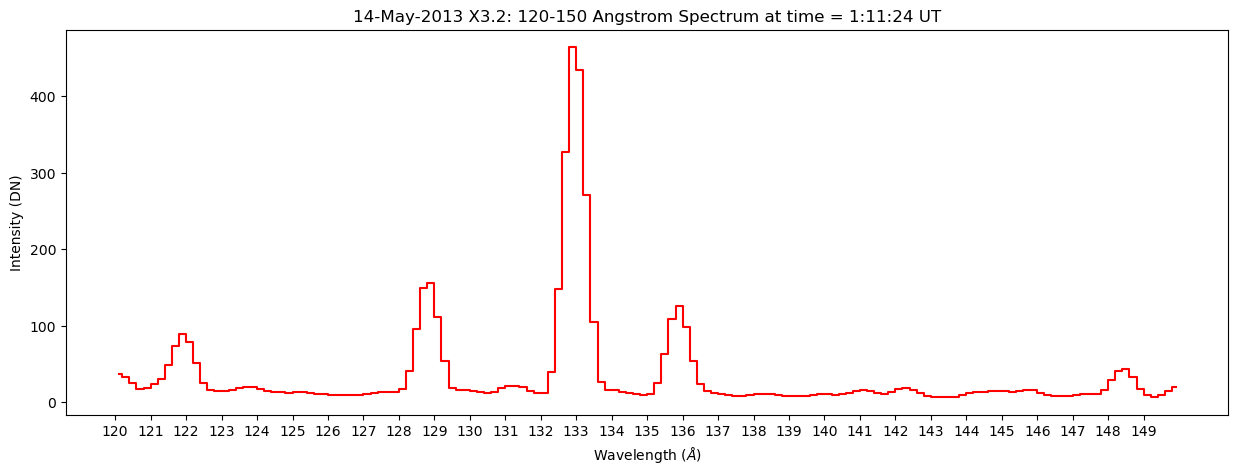

In [28]:
# change the size of the plot
plt.rcParams["figure.figsize"] = (15,5)

#plot spectrum
plt.plot(eves_wavelength_ang[450:600], spectrum_dn, color = 'r', ds ='steps-mid')
plt.xticks(ticks = np.arange(120, 150, step=1))
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Intensity (DN)')
plt.title('14-May-2013 X3.2: 120-150 Angstrom Spectrum at time = {0:.0f}:{1:.0f}:{2:.0f} UT'.format(hour,minute,sec))
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
/var/folders/g9/w6z321fx25s_jyvjvcjz53480000gn/T/ipykernel_19078/2931026181.py:7: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength ($\AA$)')


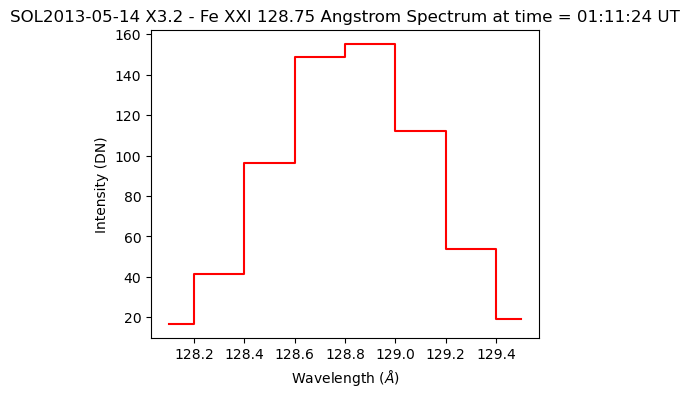

In [29]:
# change the size of the plot
plt.rcParams["figure.figsize"] = (5,4)
#plt.plot(eves_wavelength_ang[450:600], spectrum_dn, color = 'r')

plt.plot(eves_wavelength_ang[490:498], spectrum_dns[68,490:498]*eves_flare_file1[3].header['EXPTIME'], color = 'r', ds ='steps-mid')
#plt.xticks(ticks = np.arange(130.5, 132, stp=0.2))
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Intensity (DN)')
plt.title('SOL2013-05-14 X3.2 - Fe XXI 128.75 Angstrom Spectrum at time = 0{0:.0f}:{1:.0f}:{2:.0f} UT'.format(hour,minute,sec))
plt.show()